# 데이터 불러오기

In [334]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from category_encoders import OneHotEncoder, OrdinalEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from matplotlib import rc #맥 한글깨짐
rc('font', family='AppleGothic')#맥 한글깨짐


Telco Systems의 데이터를 통해 고객 이탈을 예측하고, 고객을 유지하고자 합니다. 
Telco Systems는 통신과 관련된 서비스를 제공하는 미국 기업입니다.

해당 데이터셋은 다음의 내용을 담고 있습니다.

- customerID : 소비자의 식별자 
- gender : 성별
- SeniorCitizen : 노인인지의 여부
- Partner : 배우자의 유무
- Dependents : 자녀의 유무
- tenure : 고객의 가입 기간 (개월 수)
- PhoneService : 휴대폰 서비스를 가입 했는지의 여부
- MultipleLines : 여러 개의 통신선을 서비스 받고 있는지의 여부 (Yes, No, No phone service) / 휴대폰 서비스를 가입한 고객만 해당됨.
- InternetService : 인터넷 서비스 제공자 (DSL, Fiber optic, No)
- OnlineSecurity : 온라인 보안 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- OnlineBackup : 온라인 백업 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- DeviceProtection 기기 보호 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- TechSupport : 기술 서포트 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- StreamingTV : TV 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- StreamingMovies : 영화 스트리밍 서비스를 가입 했는지의 여부 (Yes, No, No internet service) / 인터넷 서비스를 가입한 고객만 해당됨.
- Contract : 계약 유형 (Month-to-month, One year, Two year)
- PaperlessBilling : 전자 고지서 여부
- PaymentMethod : 요금 지불 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : 매달 고객에게 청구되는 금액
- TotalCharges : 고객에게 청구된 총 금액
- Churn : 지난 한 달 내에 떠난 고객인지의 여부

In [335]:
df = pd.read_csv('/Users/yeseulseo/Section2/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 중복 ID 검사

In [336]:
def analysis_on_features(df):
    duplicated_rows = 0
    dupli = df.duplicated(subset=['customerID'])
    for i in dupli.index:
        if dupli[i] == True:
            duplicated_rows += 1
            print(i)
    return duplicated_rows

In [337]:
data_duplicated_rows = analysis_on_features(df)
print('데이터의 중복열 개수는 {}개 이다.' .format(data_duplicated_rows))

데이터의 중복열 개수는 0개 이다.


# 결측치 확인

In [338]:
def check_missing_col(df):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(df.columns):
        missing_values = sum(df[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print("f결측치가 있는 컬럼은: {col}입니다.")
            print(f"해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.")
            missing_col.append([col, df[col].dtype])
        
    if counted_missing_col == 0:
        print("결측치가 존재하지 않습니다.")
    return missing_col

In [339]:
missing_col = check_missing_col(df)

결측치가 존재하지 않습니다.


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# EDA

In [341]:
# Target var
df_target = ["Churn"]

# 고객 개인정보  
df_customer= ['gender','SeniorCitizen', 'Partner', 'Dependents']

# 서비스관련 데이터 
df_services= ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport']

# 지불관련 정보
df_pay = ['Contract','PaperlessBilling','PaymentMethod']

# numerical attributes
df_num = ['tenure','MonthlyCharges','TotalCharges']

In [342]:
df1=df.copy() 

In [343]:
#No phone service라는 것은 결국 가입이 안됐다고 볼 수 있으므로 NO로 변경
colunm_no=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in colunm_no:
    replace1 = {i : {'No internet service':'No'}}
    df1 = df1.replace(replace1)
replace2 = {'MultipleLines' : {'No phone service':'No'}}
df1 = df1.replace(replace2)


## 이상치확인

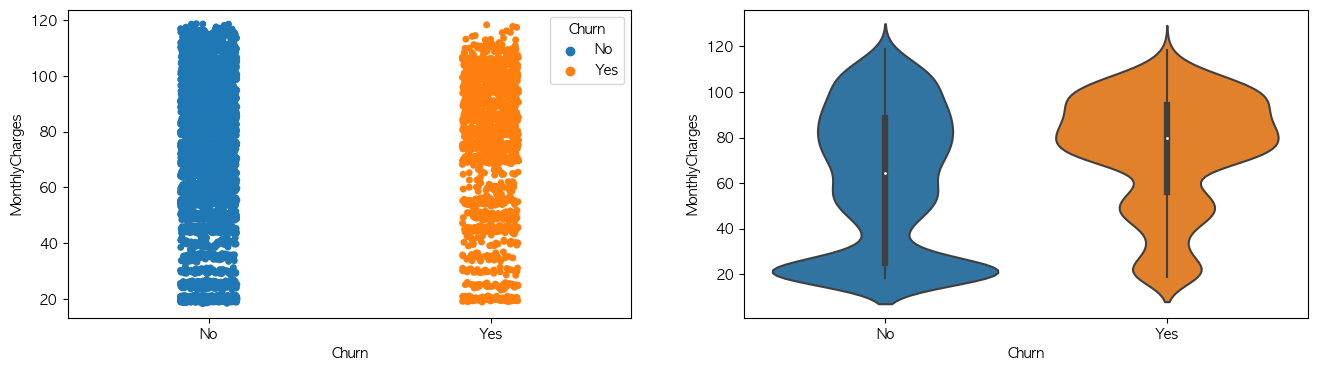

In [344]:
numerical_columns =df1.select_dtypes(exclude=['object','int']).columns.tolist()

def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df1['Churn'],y=df1[column], ax=ax[0],hue=df1['Churn'])
        sns.violinplot(data=df1, x='Churn', y=column, ax=ax[1])
        
show_dist_plot(df1, numerical_columns)

## 이탈 비율 그래프

In [345]:
def ratio(colunm,A,B,index_A,index_B,xlabel,title):
    df_A = df1[ df1[colunm]==A]
    df_B = df1[ df1[colunm]==B]
    churn_A = df_A.Churn.value_counts(normalize=True)
    churn_B = df_B.Churn.value_counts(normalize=True)
    df_churn=pd.DataFrame({'이탈 X':[churn_A[0],churn_B[0]],
                        '이탈 O':[churn_A[1],churn_B[1]]},
                        index=[index_A,index_B]
                        )
    ax =df_churn.round(2).plot(kind="bar",stacked=True,figsize=(5,5),color=['red','b'],alpha=0.3)      # stacked

    for c in ax.containers:
        labels = [ x.get_height() for x in c ]
        ax.bar_label(c,fontsize=10, label_type='center')
    plt.xlabel(xlabel, fontsize=13)
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=10,rotation=0) 
    plt.grid(color='black',linestyle = ':',alpha=0.5)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5), shadow=True, ncol=1)
    


In [346]:
def count_churn(colunm):
    df= pd.crosstab(df1[colunm],df1['Churn'])
    return df


## 카이제곱검정

In [347]:
def chi_square_test(data,column):
    stat,p,dof,expected=chi2_contingency(data)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Churn(타켓)과 '+ column + '간 연관성이 있음 (H0 기각)')
    else : 
        print("Churn(타켓)과 "+ column + "간 연관성이 없음 (H0 채택)")

In [348]:
def chi_square_test2(column):
    df=count_churn(column)
    return chi_square_test(df,column)

## 개인정보


### gender

남 / 녀

In [349]:
chi_square_test2('gender')

p value is 0.48657873605618596
Churn(타켓)과 gender간 연관성이 없음 (H0 채택)


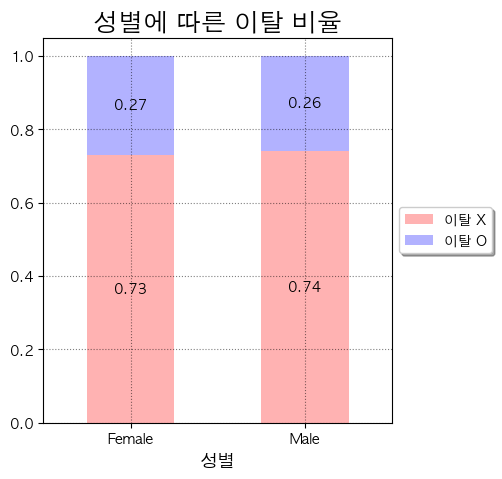

In [350]:
ratio('gender','Female','Male','Female','Male','성별', '성별에 따른 이탈 비율')

### SeniorCitizen

노인인지 아닌지

In [351]:
chi_square_test2('SeniorCitizen')

p value is 1.510066805092378e-36
Churn(타켓)과 SeniorCitizen간 연관성이 있음 (H0 기각)


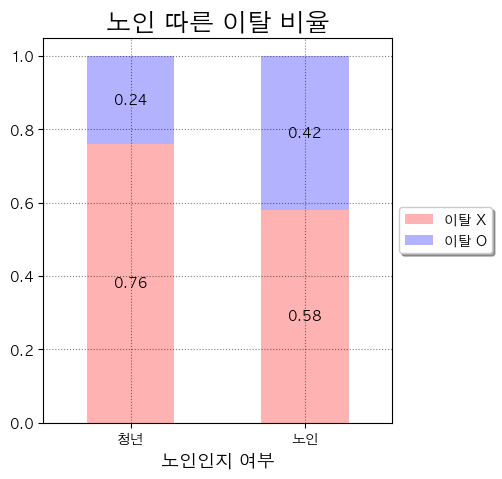

In [352]:
ratio('SeniorCitizen',0,1,'청년','노인','노인인지 여부','노인 따른 이탈 비율')

### Partner

배우자 유무

In [217]:
chi_square_test2('Partner')

p value is 2.1399113440759935e-36
Churn(타켓)과 Partner간 연관성이 있음 (H0 기각)


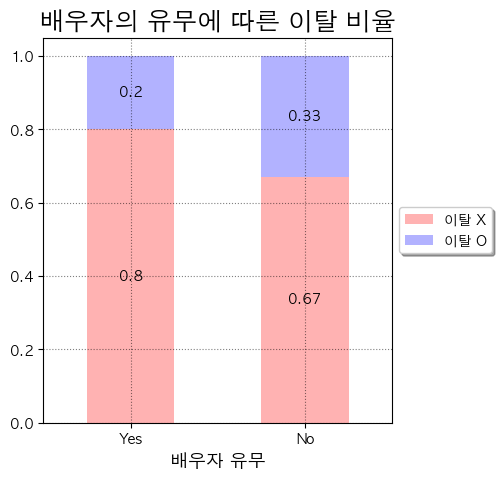

In [193]:
ratio('Partner','Yes','No','Yes','No','배우자 유무', '배우자의 유무에 따른 이탈 비율')

### Dependents

자녀의 유무

In [242]:
chi_square_test2('Dependents')

p value is 4.9249216612154196e-43
Churn(타켓)과 Dependents간 연관성이 있음 (H0 기각)


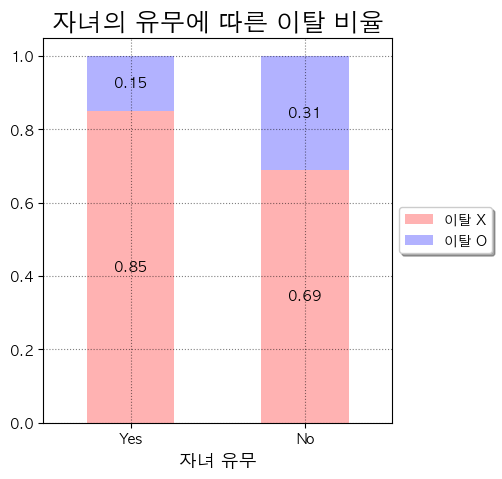

In [194]:
ratio('Dependents','Yes','No','Yes','No','자녀 유무', '자녀의 유무에 따른 이탈 비율')

## 서비스

### PhoneService

휴대폰서비스 가입 유무

In [243]:
chi_square_test2('PhoneService')

p value is 0.3387825358066928
Churn(타켓)과 PhoneService간 연관성이 없음 (H0 채택)


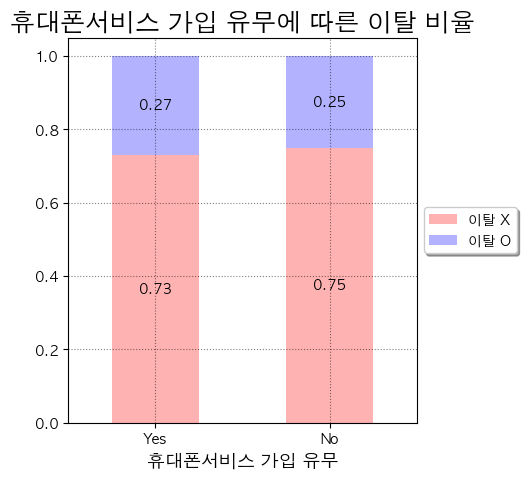

In [244]:
ratio('PhoneService','Yes','No','Yes','No','휴대폰서비스 가입 유무', '휴대폰서비스 가입 유무에 따른 이탈 비율')

### MultipleLines

여러 개의 통신선을 서비스 사용 유무

In [245]:
chi_square_test2('MultipleLines')

p value is 0.0008433795342472428
Churn(타켓)과 MultipleLines간 연관성이 있음 (H0 기각)


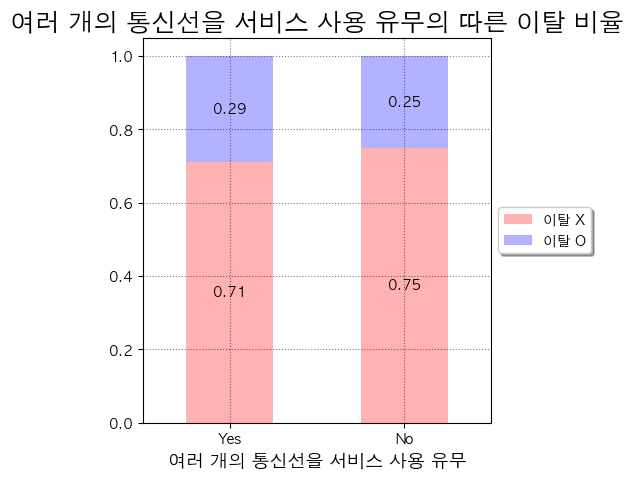

In [246]:
ratio('MultipleLines','Yes','No','Yes','No','여러 개의 통신선을 서비스 사용 유무', '여러 개의 통신선을 서비스 사용 유무의 따른 이탈 비율')

### OnlineSecurity

온라인 보안 서비스를 가입 

In [247]:
chi_square_test2('OnlineSecurity')

p value is 1.2320984831180024e-46
Churn(타켓)과 OnlineSecurity간 연관성이 있음 (H0 기각)


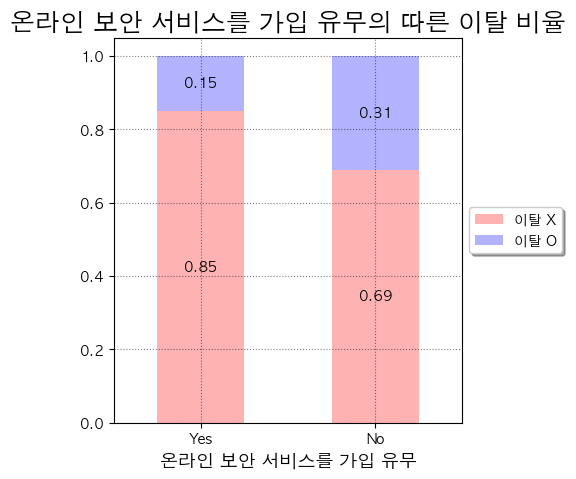

In [249]:
ratio('OnlineSecurity','Yes','No','Yes','No','온라인 보안 서비스를 가입 유무', '온라인 보안 서비스를 가입 유무의 따른 이탈 비율')

### OnlineBackup

온라인 백업 서비스를 가입

In [250]:
chi_square_test2('OnlineBackup')

p value is 6.214092807254819e-12
Churn(타켓)과 OnlineBackup간 연관성이 있음 (H0 기각)


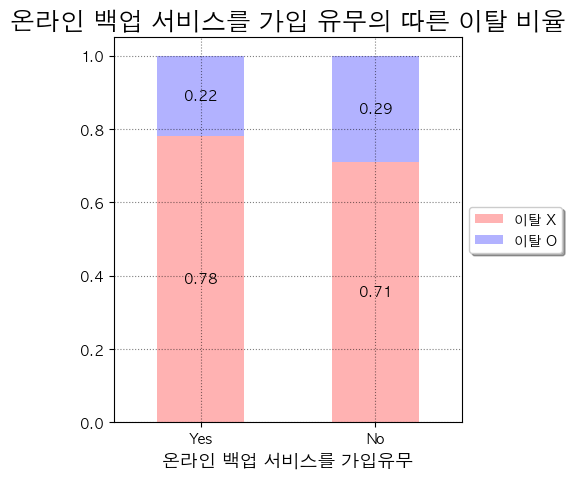

In [251]:
ratio('OnlineBackup','Yes','No','Yes','No','온라인 백업 서비스를 가입유무', '온라인 백업 서비스를 가입 유무의 따른 이탈 비율')

### DeviceProtection

 기기 보호 서비스 가입 유무

In [252]:
chi_square_test2('DeviceProtection')

p value is 3.315693222362861e-08
Churn(타켓)과 DeviceProtection간 연관성이 있음 (H0 기각)


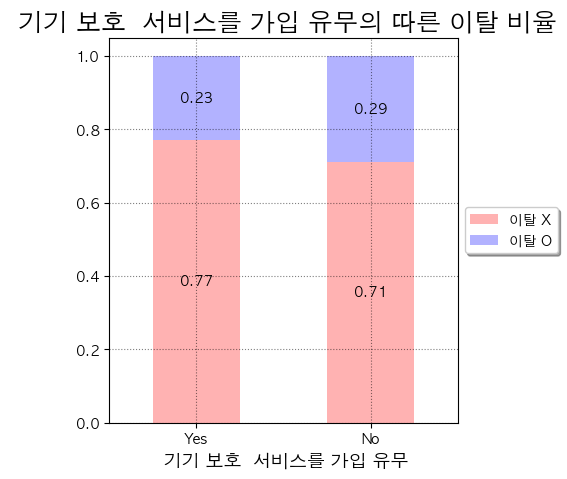

In [253]:
ratio('DeviceProtection','Yes','No','Yes','No',' 기기 보호  서비스를 가입 유무', ' 기기 보호  서비스를 가입 유무의 따른 이탈 비율')

### TechSupport

기술 서포트 서비스를 가입 유무

In [254]:
chi_square_test2('TechSupport')

p value is 2.9235674453140758e-43
Churn(타켓)과 TechSupport간 연관성이 있음 (H0 기각)


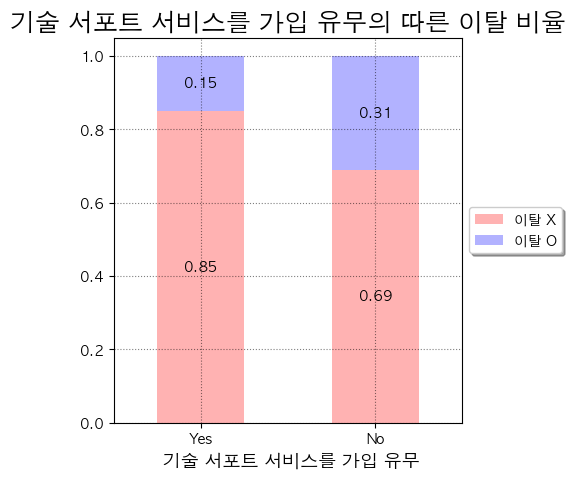

In [255]:
ratio('TechSupport','Yes','No','Yes','No',' 기술 서포트 서비스를 가입 유무', '기술 서포트 서비스를 가입 유무의 따른 이탈 비율')

### StreamingTV

TV 스트리밍 서비스를 가입 유무

In [256]:
chi_square_test2('StreamingTV')

p value is 1.3024835736732686e-07
Churn(타켓)과 StreamingTV간 연관성이 있음 (H0 기각)


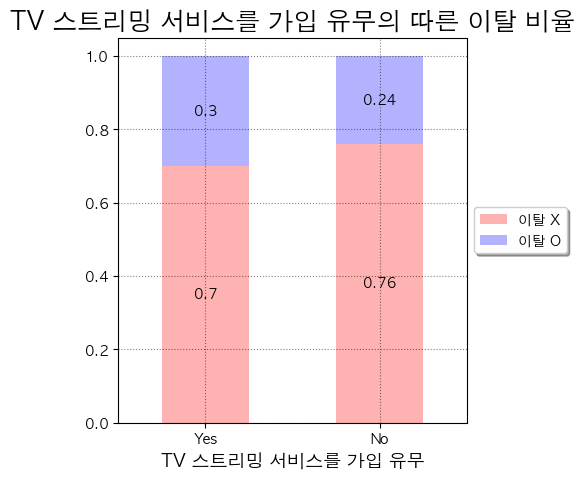

In [257]:
ratio('StreamingTV','Yes','No','Yes','No','TV 스트리밍 서비스를 가입 유무', 'TV 스트리밍 서비스를 가입 유무의 따른 이탈 비율')

### StreamingMovies

영화 스트리밍 서비스 가입 유무

In [258]:
chi_square_test2('StreamingMovies')

p value is 2.9974738476267514e-07
Churn(타켓)과 StreamingMovies간 연관성이 있음 (H0 기각)


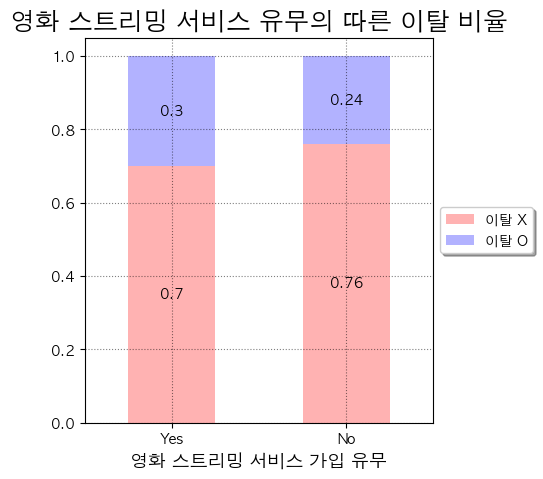

In [259]:
ratio('StreamingMovies','Yes','No','Yes','No','영화 스트리밍 서비스 가입 유무', '영화 스트리밍 서비스 유무의 따른 이탈 비율')

### 이탈한 고객의 계약 유형

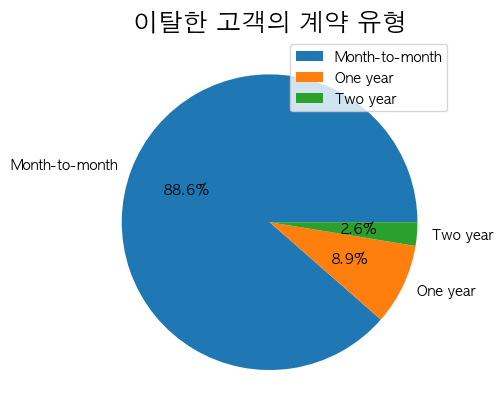

In [360]:
df_Contract=count_churn('Contract')

plt.pie(df_Contract['Yes'],labels=df_Contract.index, autopct='%.1f%%')
plt.title("이탈한 고객의 계약 유형", fontsize=18)
plt.legend(loc='upper right') ## 범례 표시
plt.show()

### 가입기간별 이탈 비율

가입기간을 개월수에서 년으로 바꿔서 계산

In [304]:
df_churn = df1.copy()
df_churn['tenure_year']=df_churn['tenure']//12
df_churn['tenure_year'].describe()


count    7043.000000
mean        2.285958
std         2.017253
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: tenure_year, dtype: float64

In [328]:
df_tenure= pd.crosstab(df_churn['tenure_year'],df_churn['Churn'])
df_tenure.reset_index
df_tenure.index = ['1년이내','1년-2년','2년-3년','3년-4년','4년-5년','5년-6년',"6년이상"]
df_tenure1=df_tenure.copy()
df_tenure1['ratio']=(df_tenure['Yes']/(df_tenure['No']+df_tenure['Yes'])).round(2)
df_tenure1

Churn,No,Yes,ratio
1년이내,1070,999,0.48
1년-2년,738,309,0.30
2년-3년,683,193,0.22
3년-4년,602,146,0.20
4년-5년,697,123,0.15
5년-6년,1028,93,0.08
6년이상,356,6,0.02


## 고객의 가입 기간과 고객에게 청구된 매달 금액의 분석

상관관계 : 상관관계가 있으나 낮다.

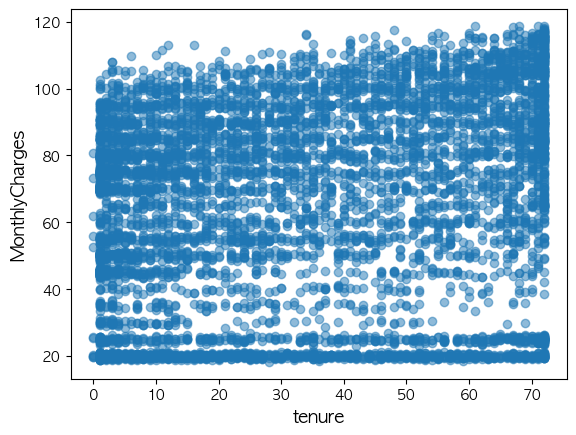

In [361]:
x = df1.tenure.values
y = df1.MonthlyCharges.values
plt.scatter(x, y, alpha=0.5)
plt.xlabel('tenure', fontsize=13)
plt.ylabel('MonthlyCharges', fontsize=13)
plt.show()

In [332]:
cov = (np.sum(x*y) - len(x)*np.mean(x)*np.mean(y)) / len(x)
print("공분산: ", cov)
print()

corr = cov / (np.std(x) * np.std(y))
print("상관계수: ", corr)

공분산:  183.17097627544987

상관계수:  0.24789985628615002
